# 나랑 닮은 연예인은 누구?

In [1]:
import face_recognition
import os
import matplotlib.image as mpimg
from PIL import Image
import cv2
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/image'
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/image'

## 사진속의 얼굴만 추출해보자

In [3]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

In [4]:
def get_gropped_face_save(dir_path, path_to_save):
    file_list = os.listdir(dir_path)
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        pillow_image = Image.fromarray(face)
        pillow_image.save(path_to_save + os.path.splitext(file)[0])
            
# get_gropped_face_save(dir_path, path_to_save)

## 임베딩

In [5]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [6]:
import matplotlib.image as mpimg

In [7]:
def get_face_embedding_dict(path_to_save):
    file_list = os.listdir(path_to_save)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(path_to_save, file)
        face = mpimg.imread(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict

In [8]:
embedding_dict = get_face_embedding_dict(path_to_save)

## 내 사진과 다른 사진 비교해보기

In [9]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [10]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [11]:
def get_nearest_face(name, top=4):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    return sorted_faces, sort_key_func, 

In [20]:
sorted_faces, key = get_nearest_face('chaewon2', 6)

순위 1 : 이름(ray), 거리(0.44014386479479545)
순위 2 : 이름(hani), 거리(0.4804815731267406)
순위 3 : 이름(hyein), 거리(0.4982889304881008)
순위 4 : 이름(minji), 거리(0.5271248403842206)
순위 5 : 이름(yujin), 거리(0.52842485722185)
순위 6 : 이름(gaeul), 거리(0.54224196735045)


## 시각화 하기

연예인 닮은 꼴 찾기 1번째  결과 : ray
연예인 닮은 꼴 찾기 2번째  결과 : hani
연예인 닮은 꼴 찾기 3번째  결과 : hyein
연예인 닮은 꼴 찾기 4번째  결과 : minji
연예인 닮은 꼴 찾기 5번째  결과 : yujin


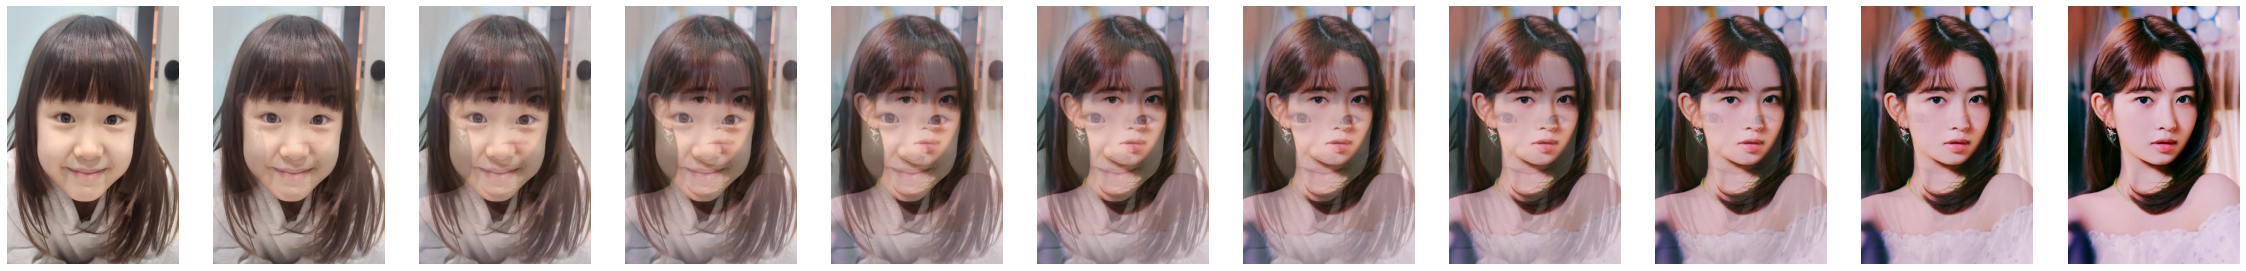

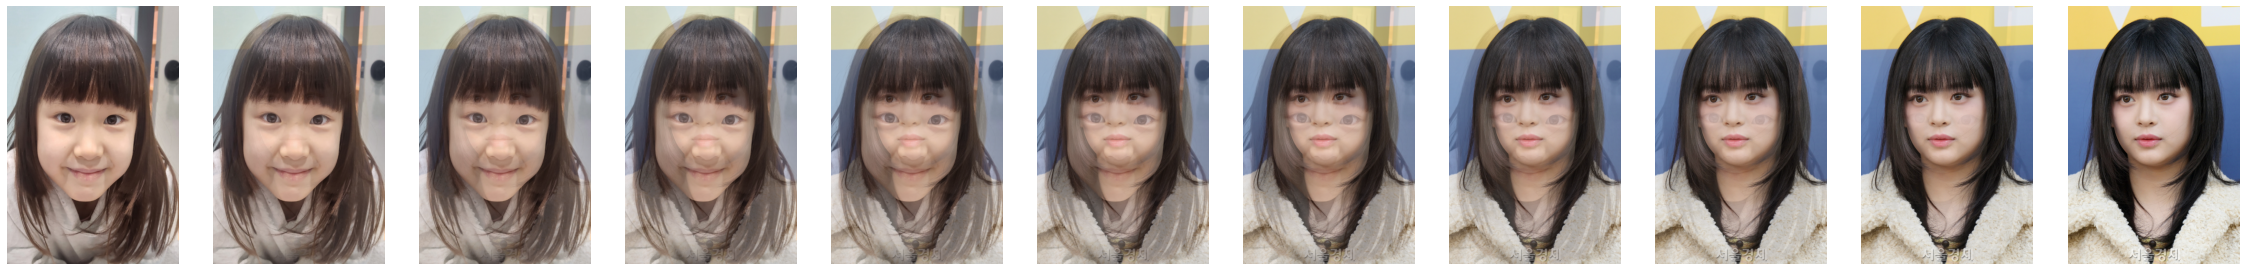

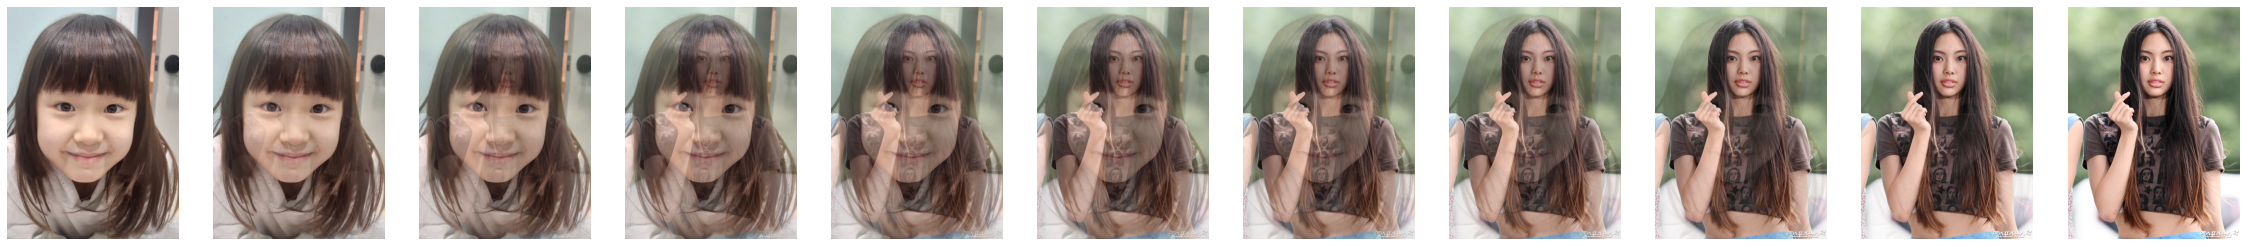

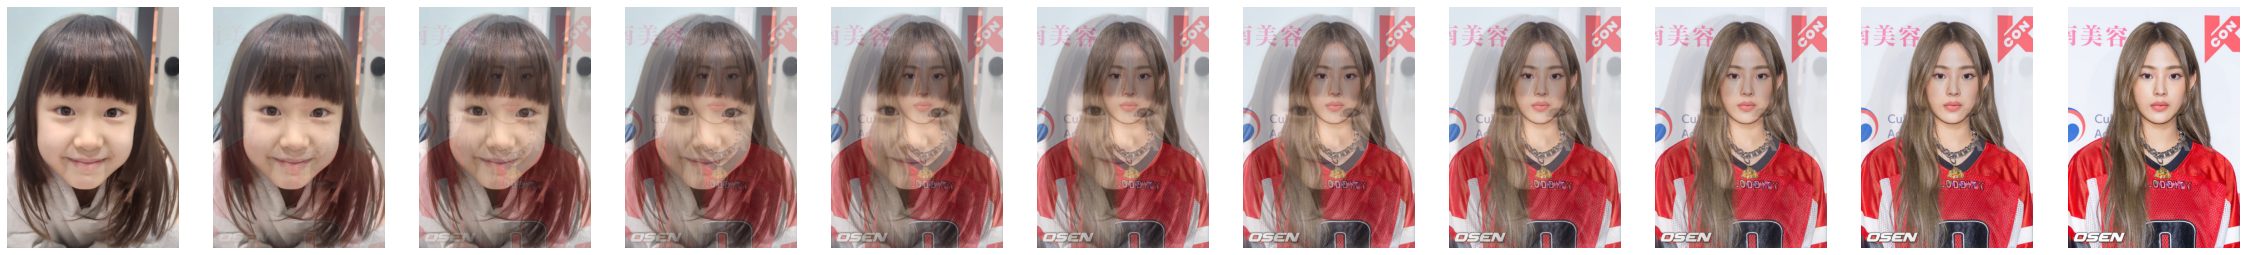

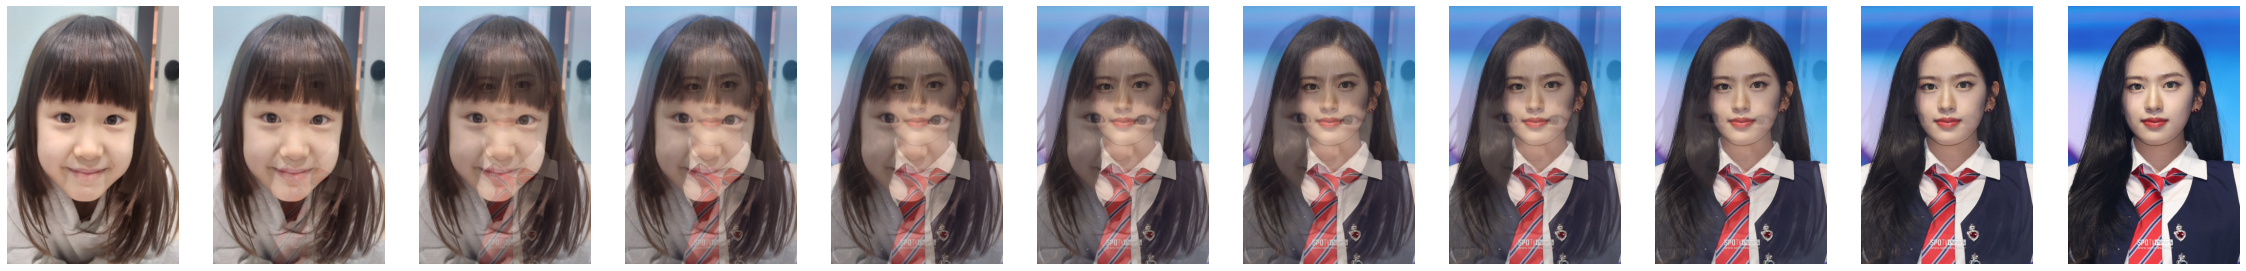

In [45]:
import cv2
import sys
# img2 = cv2.imread(sys.path_to_save[0]+"/chaewon2.jpg", 1)
# img2 = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread(os.getenv('HOME')+'/aiffel/face_embedding/image/chaewon2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# img2 = cv2.imread(path_to_save + 'chaewon2.jpg')

for k in range(5):
    a = 0.0
    i = 0

    fig, axes = plt.subplots(1, 11, figsize=(40, 40))
    
    img1 = cv2.imread(os.getenv('HOME')+'/aiffel/face_embedding/image/' + sorted_faces[k+1][0] + '.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    
    print('연예인 닮은 꼴 찾기 {}번째  결과 : {}'.format(k+1 , sorted_faces[k+1][0]))
    
    while(i < 11):
        # 블렌딩하는 두 이미지의 크기가 같아야함
        width = img1.shape[1]
        height = img1.shape[0]
        img2 = cv2.resize(img2, (width, height))

        # img1 사진은 점점 투명해지고 img2 사진은 점점 불투명해짐
        b = 1.0 - a
        dst1 = cv2.addWeighted(img1, a, img2, b, 0)
        axes[i].imshow(dst1)
        axes[i].axis('off')
        a = a + 0.1
        i = i +1

# 회고

### -사진을 백터화하여 백터 사이의 거리로 사진의 차이점을 알게 되었다.
### -그로인해 다른점과 같은점을 수치화하고 동일한 부분을 알아 낼 수 있었다.
### -사진의 경로를 지정하여 로드해서 동일한 사이즈로 변경하여 진행.
### -마지막 부분에 본인 사진과 다른 사진들을 겹쳐보이며 차이점을 시각화 하였다.
### -opencv를 활용하면 보다 더 다양한 효과를 접목하여 여러가지 테스트를 해볼 수 있을 것 같다는 생각이 들었다.
### -임베딩에 대한것과 활용법을 조금 알 수 있었던 시간이었던 것 같다.